# Selecting Halos

This notebook will describe how we will iterate over halos using pynbody. Using a single snapshot, I will generate a grid of images to visualize each halo.

In [1]:
import matplotlib
matplotlib.use("TKAgg")
%matplotlib inline

import pynbody
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from analysis import load_snapshot_and_halos
import analysis.conf as conf

pynbody.logger.setLevel(pynbody.logging.ERROR)

/Users/kevinyu/Dev/ubiquitous-meow/env/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
s, h = load_snapshot_and_halos(conf.SAMPLE)

/Users/kevinyu/Dev/ubiquitous-meow/env/lib/python2.7/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'omegaM0'=3.09e-01
  name, value), RuntimeWarning)
/Users/kevinyu/Dev/ubiquitous-meow/env/lib/python2.7/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'omegaL0'=6.91e-01
  name, value), RuntimeWarning)


The halo catalog contains several hundred halos. We can iterate through them by checking the length of the catalog, and accessing them by index.

For this example, I just want to plot images of some of the galaxy halos in the catalog. I'll only look at the 64 largest halos. Many of them do not have any star particles, or are too sparse for pynbody to center them, so I skip those.

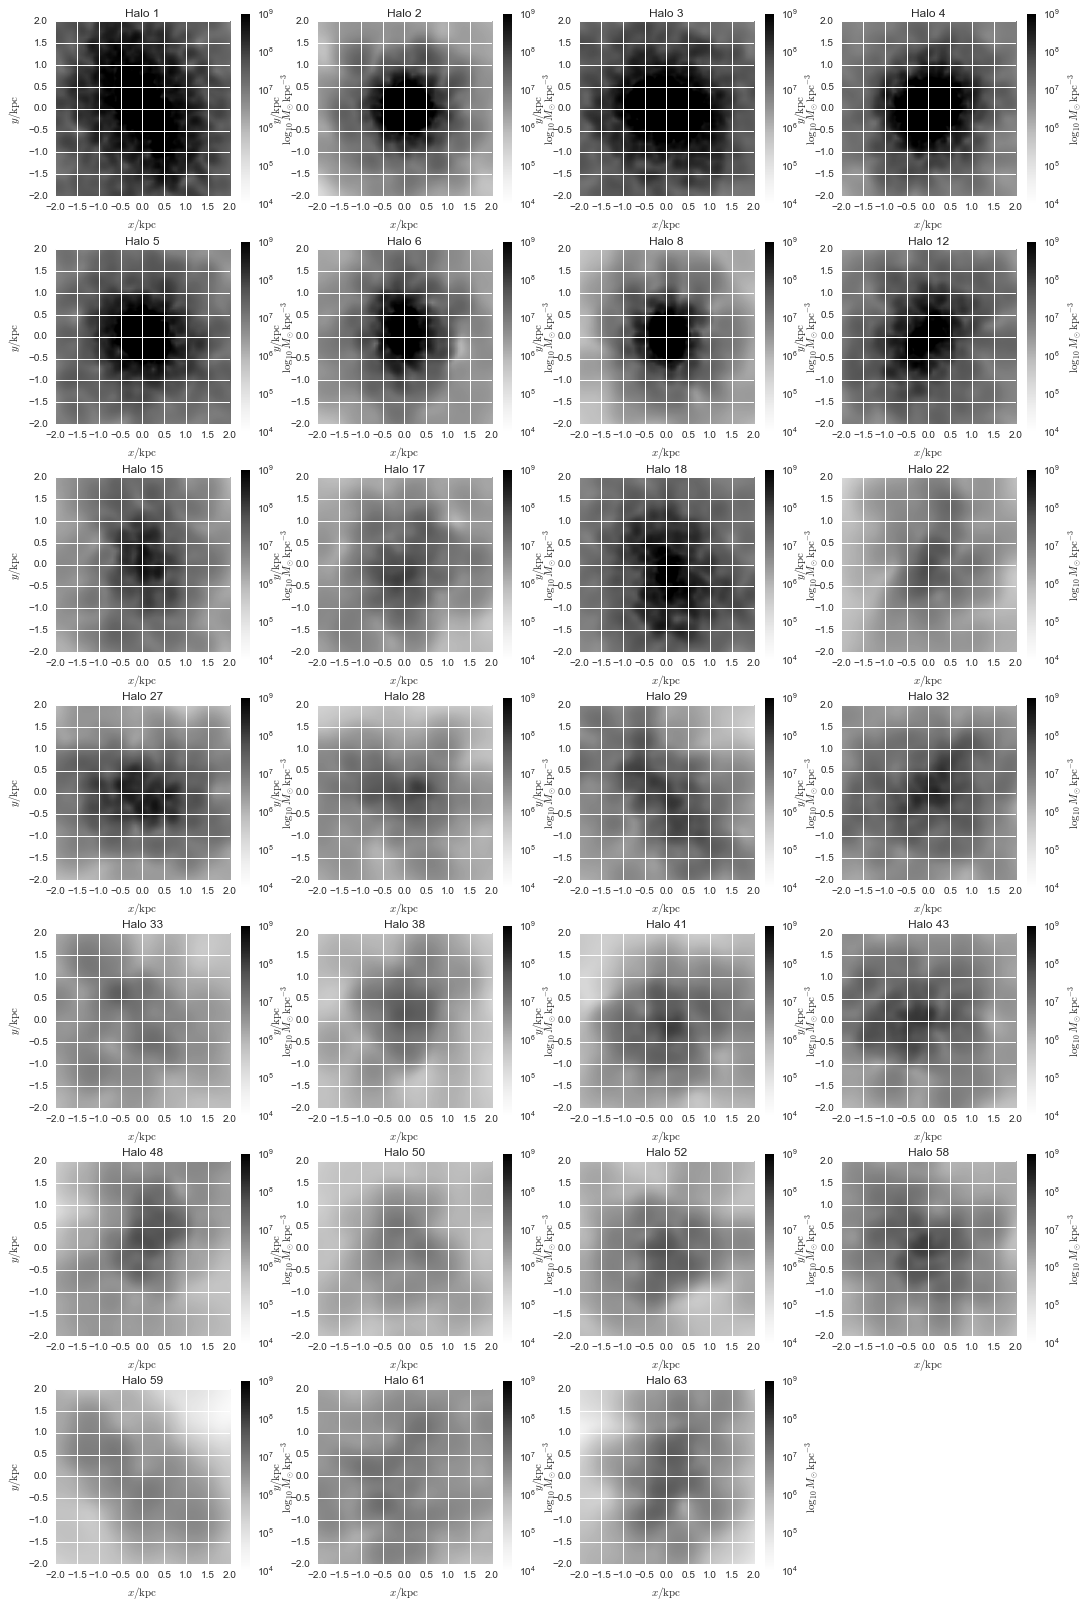

In [3]:
pyplot.rcParams['figure.figsize'] = 18, 32

def subplot_iterator(rows, cols):
    """Iterate over subplots with specified rows and columns"""
    for i in range(1, rows * cols + 1):
        yield pyplot.subplot(rows, cols, i)
        
subplots = subplot_iterator(8, 4)  # We'll allocate space 32 subplots, but we won't need them all

for i in range(1, 64):
    halo = h[i]
    if not len(halo.s):
        # Some halos will have no stars; Obviously, do not plot these
        continue

    try:
        with pynbody.analysis.halo.center(halo, mode="pot"), pynbody.analysis.angmom.faceon(halo):
            pynbody.plot.image(halo.s, width="4 kpc", cmap="Greys", subplot=subplots.next())
    except ValueError:
        # Some smaller halos are too sparse, and do not have enough particles at the center
        continue

    pyplot.title("Halo {}".format(i))
    pyplot.gca().get_images()[0].set_clim([1e4, 1e9])